In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")


In [12]:
data=pd.read_csv("C:\\Users\\DELL\\Data Science\\Abhishek ExcelR\\Data Science\\Assignments\\Simple Linear Regression\\Salary_Data.csv")

In [13]:
data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


From above information we can see that there is no null values in data set. so we Find Duplicates in data

In [8]:
data.duplicated().sum()

0

In [10]:
data[data.duplicated()]

,YearsExperience,Salary


In [7]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Plotting the data

## To check outlier we plot Box-Plot

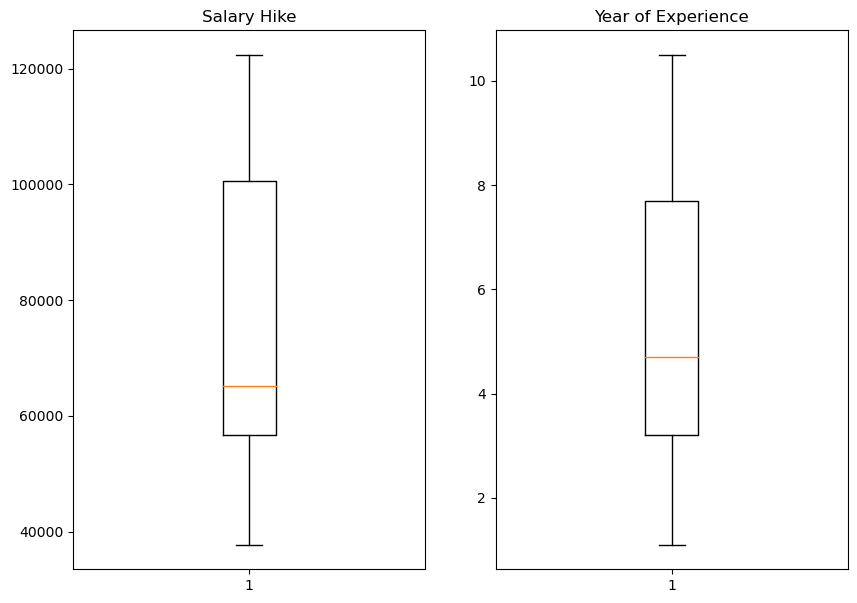

In [19]:
plt.subplots(figsize=(10,7))
plt.subplot(121)
plt.boxplot(data["Salary"])
plt.title("Salary Hike")

plt.subplot(122)
plt.boxplot(data["YearsExperience"])
plt.title("Year of Experience")
plt.show()

## So we can see in above plot there is no outliers in data.
#### Now we check the correlation between Salary and Yers experience.

In [20]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## Now we plot reg plot to visualize corr between salary and experince.

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

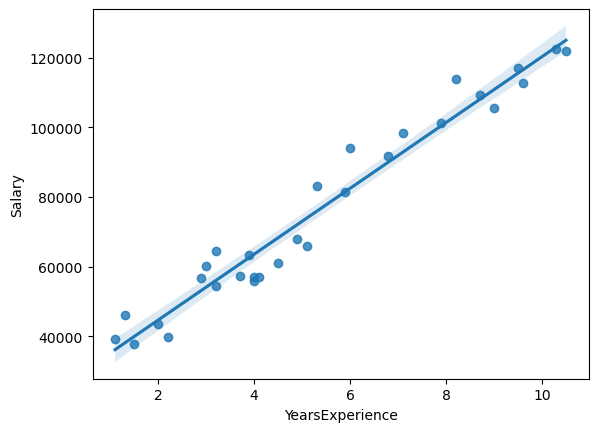

In [21]:
x=data["YearsExperience"]
y=data["Salary"]

sn.regplot(x,y)

## As we can see above plot concludes that,
### There is good correlation between the two variable.
### The score is more than 0.8 which is a good sign

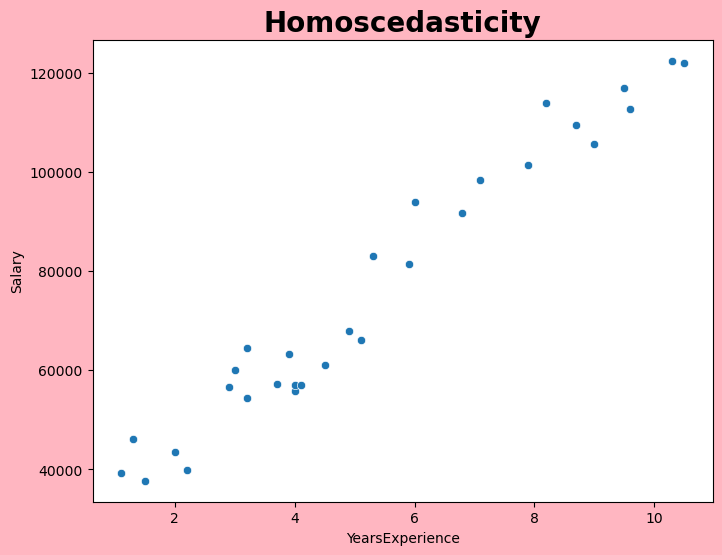

In [23]:
#Checking for Homoscedasticity or Hetroscedasticity

plt.figure(figsize = (8,6), facecolor = 'lightpink')
sn.scatterplot(x , y )
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 20)
plt.show()

## As we can see in above graph
### 1)It shows as the Salary Increases the Years of Experience increases variation is ocnstant along the way in data
### 2)The data doesn't have any specific pattern in the variation. hence, we can say it's Homoscedasticity

In [25]:
data.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

# Feature Engineering
### Trying different transformation of data to estimate normal distribution and remove any skewness

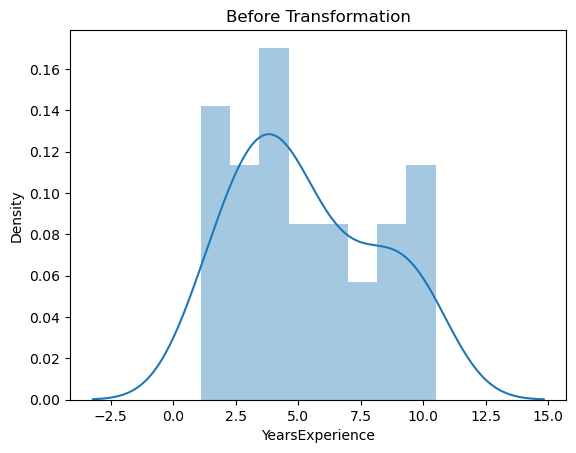

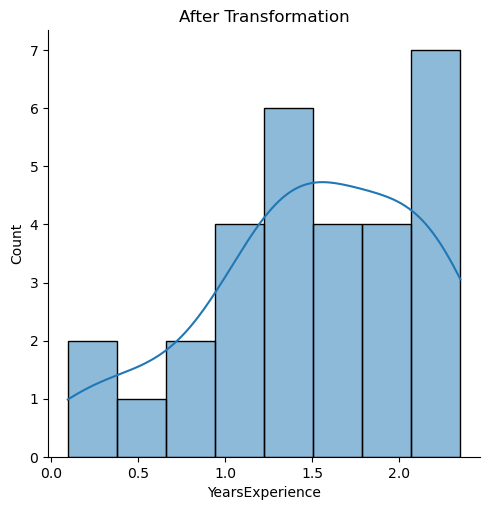

In [30]:

sn.distplot(x, bins = 8, kde = True)
plt.title('Before Transformation')

sn.displot(np.log(x), bins = 8, kde = True)
plt.title('After Transformation')
plt.show()

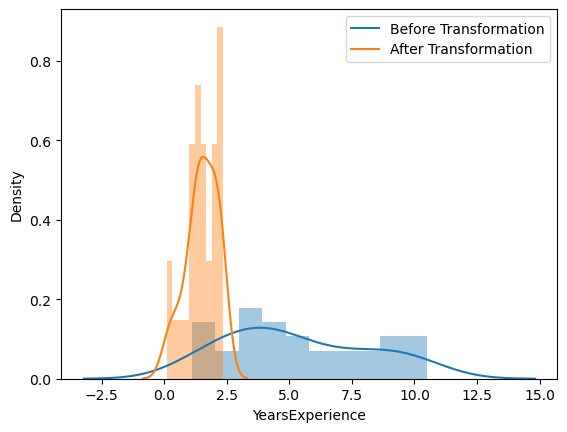

In [31]:
labels = ['Before Transformation','After Transformation']
sn.distplot(x, bins = 10, kde = True)
sn.distplot(np.log(x), bins = 10, kde = True)
plt.legend(labels)
plt.show()

## As we can see in above plots
### 1)How log transformation affects the data and it scales the values down.
### 2)Before prediction it is necessary to reverse scaled the values, even for calculating RMSE for the models.(Errors)

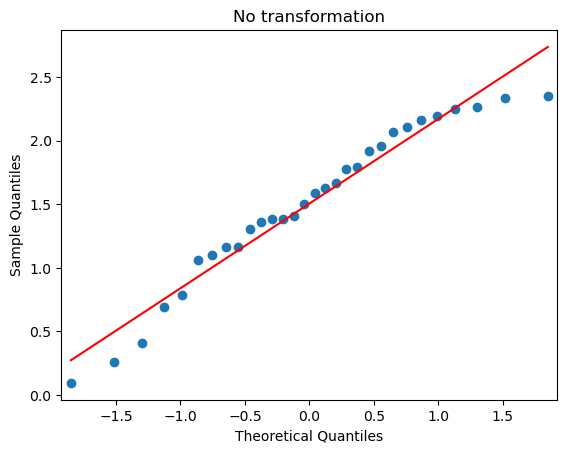

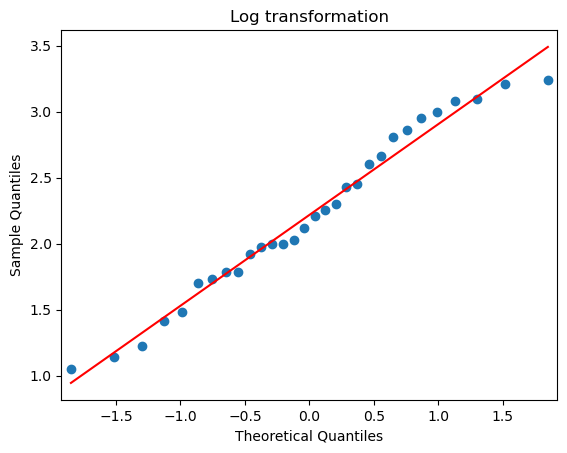

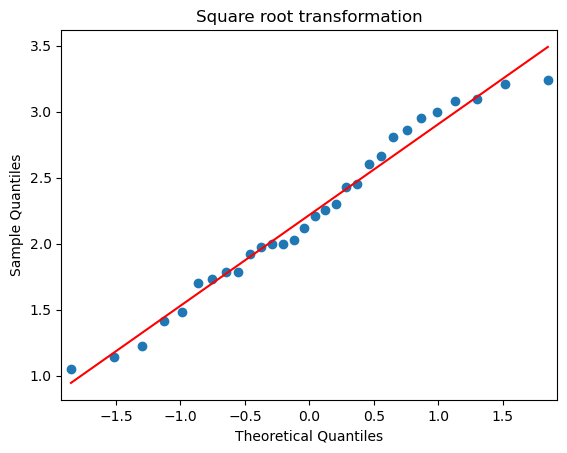

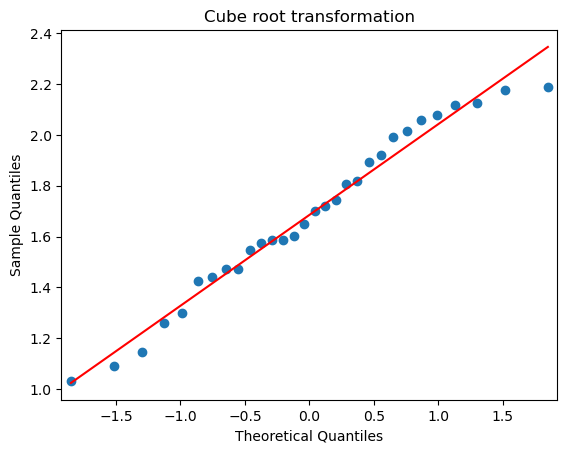

In [36]:
sm.qqplot(np.log(x), line = 'r')
plt.title('No transformation')

sm.qqplot(np.sqrt(x), line = 'r')
plt.title('Log transformation')

sm.qqplot(np.sqrt(x), line = 'r')
plt.title('Square root transformation')


sm.qqplot(np.cbrt(x), line = 'r')
plt.title('Cube root transformation')

plt.show()


## Now same this will do for salary to find the insights

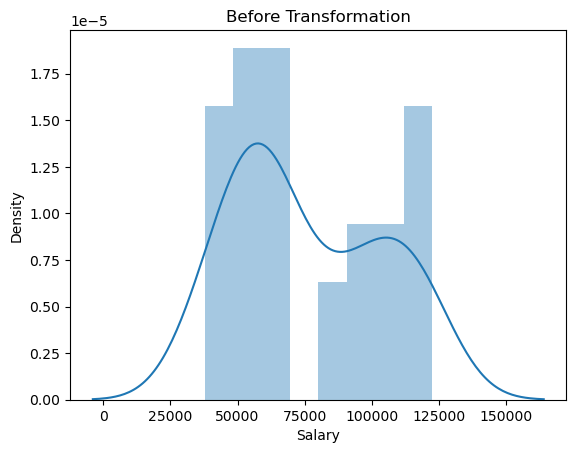

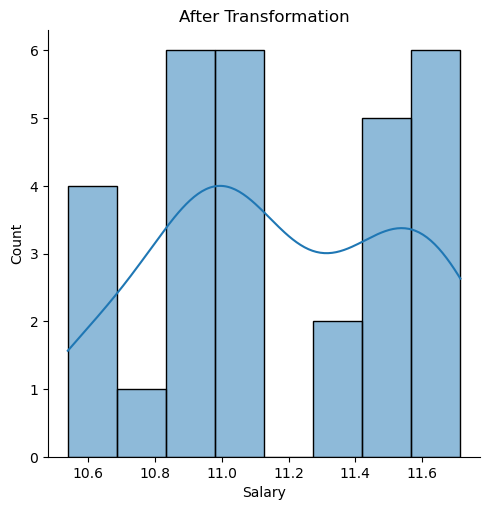

In [37]:

sn.distplot(y, bins = 8, kde = True)
plt.title('Before Transformation')

sn.displot(np.log(y), bins = 8, kde = True)
plt.title('After Transformation')
plt.show()

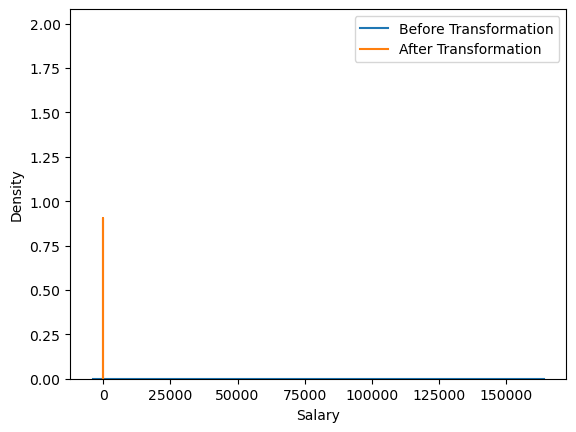

In [38]:
labels = ['Before Transformation','After Transformation']
sn.distplot(y, bins = 10, kde = True)
sn.distplot(np.log(y), bins = 10, kde = True)
plt.legend(labels)
plt.show()

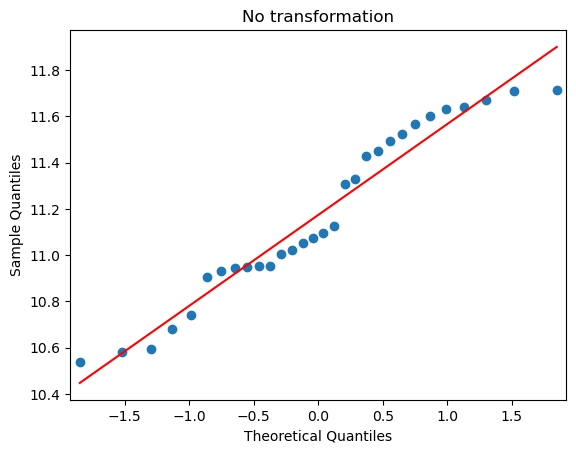

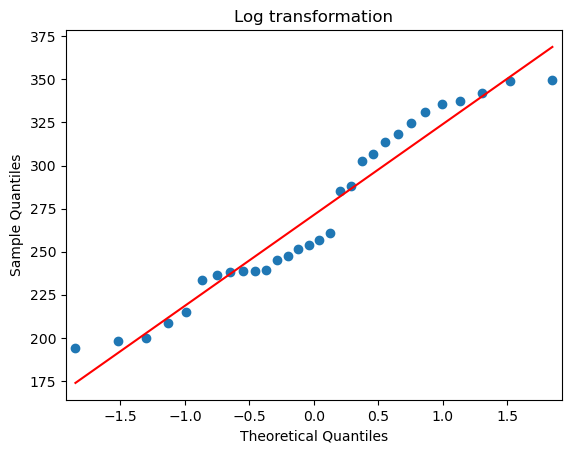

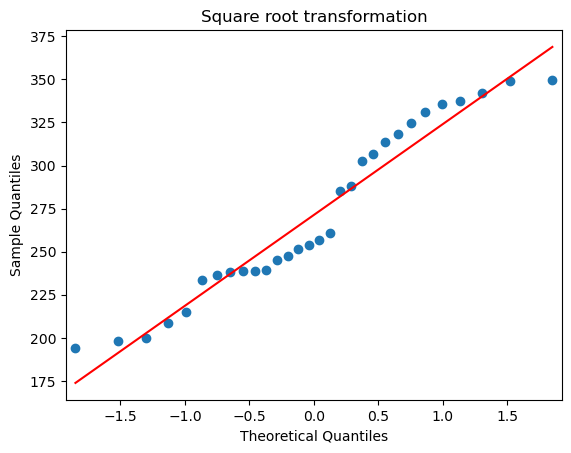

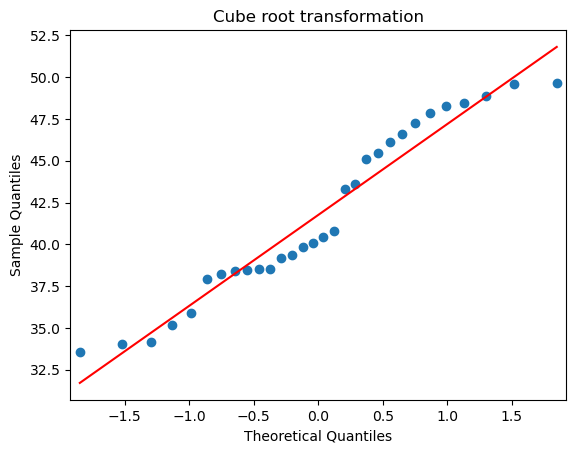

In [39]:
sm.qqplot(np.log(y), line = 'r')
plt.title('No transformation')

sm.qqplot(np.sqrt(y), line = 'r')
plt.title('Log transformation')

sm.qqplot(np.sqrt(y), line = 'r')
plt.title('Square root transformation')


sm.qqplot(np.cbrt(y), line = 'r')
plt.title('Cube root transformation')

plt.show()

In [ ]:
# Fitting a Linear Regression Model
## Using Ordinary least squares (OLS) regression
### It is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line


In [40]:
import statsmodels.formula.api as smf
model = smf.ols('Salary~YearsExperience', data = data).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           1.14e-20
Time:                        12:39:17   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# As we can notice in the above model 
 1)The R-squared and Adjusted R-squared scores are above 0.85.
(It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)
 2)F-statitics is quite high as well and yes desire it to be higher
 3)But log-likelihood is quite very low far away from 0
### Lets Try some data transformation to check whether these scores can get any better than this.

## Square -Root Transformation on data

In [66]:
model1 = smf.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = data).fit()
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           7.58e-19
Time:                        13:38:02   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Cube-Root tranformation on data


In [65]:
model2 = smf.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data = data).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           6.37e-18
Time:                        13:36:24   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Log Tranfirmation

In [64]:
model3 = smf.ols('np.log(Salary)~np.log(YearsExperience)', data = data).fit()
model3.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           7.40e-16
Time:                        13:35:33   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Testing
### As Y = Beta0 + Beta1*(X)
#### Finding Coefficient Parameters (Beta0 and Beta1 values)


In [50]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

### Here,Beta0 value=Intercept=25792.200 & Beta1=9449.96
#### Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e if (P_value < α=0.05 ; Reject Null)
#### Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)

In [53]:
print("T-Values: ","\n",model.tvalues,"\n","P-Values: " ,"\n",model.pvalues)

T-Values:  
 Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 P-Values:  
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


#### (Intercept) Beta0: tvalue=11.34 , pvalue=5.511950e-12
####  Beta1: tvalue=24.95, pvalue= 1.143068e-20
#### As (pvalue=0)<(α=0.05); Reject Null hyp. Thus, X(YearsExperience) variable has good slope and variance w.r.t Y(Salary) variable.
#### R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.
#### Measure goodness-of-fit by finding rsquared values (percentage of variance)


In [54]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

### Determination Coefficient = rsquared value = 0.95 ; very good fit >= 85%

## Model Validation
### We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the average distance (squared to get rid of negative numbers) between the model’s predicted target value and the actual target value.
### Comparing different models with respect to the Root Mean Squared Errors


In [70]:
from sklearn.metrics import mean_squared_error

model1_pred_y =np.square(model1.predict(x))
model2_pred_y =pow(model2.predict(x),3)
model3_pred_y =np.exp(model3.predict(x))

print(model1_pred_y)

0      33447.371655
1      36022.521569
2      38491.193991
3      44318.949727
4      46544.135171
5      53989.336270
6      55017.323598
7      57051.041838
8      57051.041838
9      62020.592218
10     63968.149237
11     64934.197889
12     64934.197889
13     65895.350251
14     69694.405347
15     73427.656958
16     75272.141554
17     77103.018416
18     82521.300854
19     83414.349494
20     90467.971458
21     93075.167881
22     99939.557841
23    102483.605120
24    106690.705528
25    109196.426832
26    113343.921252
27    114169.320200
28    119911.347953
29    121540.993172
dtype: float64


In [69]:
model1_rmse =np.sqrt(mean_squared_error(y, model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(y, model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(y, model3_pred_y))

print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)


model= 5788.315051119395 
model1= 5960.647096174306 
model2= 6232.815455835857 
model3= 7219.716974372746


In [76]:
rmse = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(rmse, key=rmse.get)


'model'

### As model has the minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use model to predict our values
Model is that Simple Linear regression model where we did not perfrom any data transformation and got the highest Adjusted R-squared value
